# Independent Samples $t$-Test with Unequal Variances (Welch’s $t$-Test)

**Summary**: This notebook illustrates a two-sided independent samples $t$-test to assess whether two populations have equal mean pairwise correlations.

In [126]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

# I. Simulating a Dataset from Random Samples

The t-test can examine two types of comparisons: whether two populations have equal means, a two-sided test, or if one of the population means is greater than or equal to the other, a one-sided test. 
Here, we use the **two-sided independent samples t-test** to test whether two populations have equal mean pairwise correlations.  
  
- **Null Hypothesis ($H_0$)**: Population 1 and Population two have the same mean.
    - $\mu_1 - \mu_2 = 0$
- **Alternative Hypothesis ($H_1$)**: Population 1 and Population two do not have the same mean.
    - $\mu_1 - \mu_2 \neq 0$

The t-test follows three assumptions: the populations are independent, each population’s data is normally distributed, and the data within each population are independent.  
We generate two datasets, x1 and x2, of different sample sizes n1 and n2, under these assumptions by randomly sampling from two different normal distributions with unequal variances.

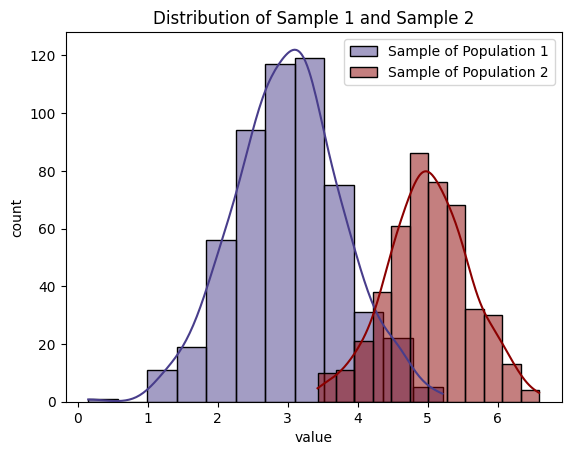

In [127]:
# population 1
n1 = 550 # arbitrary sample size
m1 = 3 # center
sd1 = 0.8 # arbitrary spread

# population 2
n2 = 450 # arbitrary sample size
m2 = 5 # center
sd2 = 0.6 # arbitrary spread

# generate two samples of different sample sizes
np.random.seed(1234)
s1 = np.random.normal(loc=m1, scale=sd1, size=n1)
s2 = np.random.normal(loc=m2, scale=sd2, size=n2)

# plot the two samples
bins = 12
ax = sns.histplot(s1, kde=True, bins=bins, label="Sample of Population 1", alpha=0.5, color="darkslateblue")
ax = sns.histplot(s2, kde=True, bins=bins, label="Sample of Population 2", alpha=0.5, color="darkred")
ax.set(xlabel='value', ylabel='count', title='Distribution of Sample 1 and Sample 2')
plt.legend()
plt.show()

# II. Calculating the $t$-Statistic and p-value

To calculate the t-statistic, we compare the sample means and calculate the estimated overall standard error of the difference between the sample means, as follows: 

In [128]:
ss = lambda data: np.sum((data - np.mean(data))**2) # sum of squared errors
var = lambda data: ss(data) / (len(data) - 1) # sample variance
sqse = lambda data: var(data) / len(data) # squared standard error 

sqse1 = sqse(s1) # squared standard error of sample 1
sqse2 = sqse(s2) # aquared standard error of sample 2
diff_means = np.mean(sqse1) - np.mean(sqse2) # get difference of means
t_stat = diff_means / np.sqrt(sqse1 + sqse2) # calculate t-score
t_stat

-46.43615371031239

Using the t-ditribution the t-statistic yields a p-value that, under a given significane level ($\alpha$ = 0.01), allows us to reject or fail to reject the null hypothesis.

In [129]:
dof = n1 + n2 - 2 # degrees of freedom
pval = (1 - t.cdf(np.abs(t_stat), dof))* 2 # p-value using the t-distribution
pval

0.0

Here, our t-statistic yields a p-value of $0.0 < \alpha$, which means we fail to reject the null hypothesis that our two populations have the equal mean pairwise correlations.